# Proyek Analisis Data: [Air Quality]
- **Nama:** Daffa Muhamad Farid
- **Email:** daffamfarid@gmail.com
- **ID Dicoding:** Daffa Muhamad Farid

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu dan tekanan terhadap polusi udara?
- Polutan apa yang memiliki jumlah paling tinggi?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
tian_df = pd.read_csv("https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
tian_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Pembuatan Data Frame untuk Stasiun Tiantan

### Assessing Data

In [3]:
tian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
tian_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


In [5]:
print("Jumlah duplikasi: ", tian_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
tian_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- Cek duplikasi data
- Cek data yang kosong

### Cleaning Data

In [7]:
tian_df.PM10.interpolate(method='linear', limit_direction='forward', inplace=True)
tian_df.SO2.interpolate(method='linear', limit_direction='forward', inplace=True)
tian_df.NO2.interpolate(method='linear', limit_direction='forward', inplace=True)
tian_df.CO.interpolate(method='linear', limit_direction='forward', inplace=True)
tian_df.O3.interpolate(method='linear', limit_direction='forward', inplace=True)
tian_df.TEMP.interpolate(method='linear', limit_direction='forward', inplace=True)
tian_df.PRES.interpolate(method='linear', limit_direction='forward', inplace=True)
tian_df.DEWP.interpolate(method='linear', limit_direction='forward', inplace=True)
tian_df.RAIN.interpolate(method='linear', limit_direction='forward', inplace=True)
tian_df.wd.interpolate(method='linear', limit_direction='forward', inplace=True)
tian_df.WSPM.interpolate(method='linear', limit_direction='forward', inplace=True)

<ipython-input-7-bb9fd256df39>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tian_df.PM10.interpolate(method='linear', limit_direction='forward', inplace=True)
<ipython-input-7-bb9fd256df39>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [8]:
tian_df.dropna(axis=0, inplace=True)

In [9]:
tian_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Mengisi data yang kosong
- Menghapus data yang kosong

## Exploratory Data Analysis (EDA)

### Explore ...

Tingkat polusi udara di Tiantan :
- Selama 20 jam pada tanggal 2013-03-01 per jam (24 data pertama)
- Selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
- Selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)
- Selama 5 tahun pada tanggal 2013 sampai 2017 (5 data pertama)

In [10]:
# Tingkat polusi udara per jam pada tanggal 2013-03-01
air_polution_hour = (
    tian_df.groupby(['year', 'month', 'day', 'hour'])[
        ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    ]
    .mean()
    .reset_index()
    .sort_values(by=['year', 'month', 'day', 'hour'])
)
air_polution_hour['time'] = air_polution_hour['hour'].astype(str) + ":00"
air_polution_hour.head(24)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,time
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,0:00
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,1:00
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,2:00
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,3:00
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,4:00
5,2013,3,1,5,10.0,10.0,12.0,15.0,400.0,70.0,5:00
6,2013,3,1,6,8.0,19.0,12.0,14.0,400.0,72.0,6:00
7,2013,3,1,7,7.0,7.0,12.0,19.0,400.0,67.0,7:00
8,2013,3,1,8,3.0,6.0,14.0,29.0,500.0,56.0,8:00
9,2013,3,1,9,8.0,2.0,11.0,22.0,500.0,65.0,9:00


In [11]:
# Tingkat polusi selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
air_polution_day = (
    tian_df.groupby(['year', 'month', 'day'])[
        ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    ]
    .mean()
    .reset_index()
    .sort_values(by=['year', 'month', 'day'])
)
air_polution_day['time'] = air_polution_day['year'].astype(str) + "-" + air_polution_day['month'].astype(str) + "-" + air_polution_day['day'].astype(str)
air_polution_day.head(10)

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,time
0,2013,3,1,8.625000,14.458333,8.875000,21.583333,450.000000,68.083333,2013-3-1
1,2013,3,2,31.708333,37.041667,26.416667,49.458333,914.583333,34.041667,2013-3-2
2,2013,3,3,98.041667,121.333333,55.625000,82.958333,2028.958333,16.916667,2013-3-3
3,2013,3,4,22.333333,37.583333,16.583333,42.041667,895.791667,53.125000,2013-3-4
4,2013,3,5,141.666667,156.375000,74.333333,101.666667,2408.000000,94.000000,2013-3-5
5,2013,3,6,193.708333,206.333333,95.583333,126.979167,3051.687500,75.333333,2013-3-6
6,2013,3,7,257.500000,278.291667,72.666667,134.083333,4416.291667,55.291667,2013-3-7
7,2013,3,8,198.857143,213.476190,48.380952,106.142857,3371.047619,101.809524,2013-3-8
8,2013,3,9,60.333333,227.791667,26.625000,41.625000,1387.291667,88.916667,2013-3-9
9,2013,3,10,38.291667,66.500000,20.666667,44.791667,822.833333,89.750000,2013-3-10


In [12]:
# Tingkat polusi selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)
air_polution_month = (
    tian_df.groupby(['year', 'month'])[
        ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    ]
    .mean()
    .reset_index()
    .sort_values(by=['year', 'month'])
)
air_polution_month['time'] = air_polution_month['year'].astype(str) + "-" + air_polution_month['month'].astype(str)
air_polution_month.head(10)

,year,month,PM2.5,PM10,SO2,NO2,CO,O3,time
0,2013,3,105.750337,122.892038,37.665317,63.680837,1546.589744,62.061920,2013-3
1,2013,4,60.538354,90.430962,21.253896,43.599603,981.573919,67.995748,2013-4
2,2013,5,80.364738,138.124495,26.944145,42.249664,1115.522207,81.656556,2013-5
3,2013,6,110.591353,133.870293,15.112273,48.807531,1443.614830,74.828533,2013-6
4,2013,7,69.371467,84.213997,6.997574,43.438281,1063.773890,77.685666,2013-7
5,2013,8,64.237903,82.295027,6.287343,40.780176,922.043011,80.186482,2013-8
6,2013,9,80.559441,106.244755,10.438152,57.831672,1330.113287,45.241355,2013-9
7,2013,10,95.137281,118.866756,13.286640,65.689839,1284.925976,25.073672,2013-10
8,2013,11,80.386111,103.433333,14.547222,57.394444,1533.680556,19.187805,2013-11
9,2013,12,85.126344,102.494624,28.760184,68.107362,1877.956989,17.285735,2013-12


In [13]:
# polusi selama 5 tahun
air_polution_year = (
    tian_df.groupby('year')[
        ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    ]
    .mean()
    .reset_index()
    .sort_values(by='year')
)
air_polution_year['time'] = air_polution_year['year'].astype(str)
air_polution_year.head(10)

,year,PM2.5,PM10,SO2,NO2,CO,O3,time
0,2013,83.200082,108.273918,18.164031,53.173616,1309.851417,55.151633,2013
1,2014,86.616550,114.593975,19.575874,56.050124,1329.209165,56.650986,2014
2,2015,82.592837,103.289988,11.823428,52.119379,1306.806047,60.217366,2015
3,2016,73.900545,97.382036,8.963653,50.039840,1201.314843,55.322665,2016
4,2017,98.211567,126.422401,13.999268,63.890556,1762.884334,35.897145,2017


Tingkat suhu dan tekanan di Tiantan :
- Selama 20 jam pada tanggal 2013-03-01 per jam (24 data pertama)
- Selama 10 hari pada tanggal 2013-03-01 sampai 2013-03-10 (10 data pertama)
- Selama 10 bulan pada tanggal 2013-03 sampai 2013-10 (10 data pertama)
- Selama 5 tahun pada tanggal 2013 sampai 2017 (5 data pertama)

In [14]:
# suhu dan tekanan selama 24 jam pada 2013-03-01
air_parameters_hour = (
    tian_df.groupby(['year', 'month', 'day', 'hour'])[['TEMP', 'PRES']]
    .mean()
    .reset_index()
    .sort_values(by=['year', 'month', 'day', 'hour'])
)
air_parameters_hour['time'] = air_parameters_hour['hour'].astype(str) + ":00"
air_parameters_hour.head(24)

,year,month,day,hour,TEMP,PRES,time
0,2013,3,1,0,-0.5,1024.5,0:00
1,2013,3,1,1,-0.7,1025.1,1:00
2,2013,3,1,2,-1.2,1025.3,2:00
3,2013,3,1,3,-1.4,1026.2,3:00
4,2013,3,1,4,-1.9,1027.1,4:00
5,2013,3,1,5,-2.4,1027.5,5:00
6,2013,3,1,6,-2.5,1028.2,6:00
7,2013,3,1,7,-1.4,1029.5,7:00
8,2013,3,1,8,-0.3,1030.4,8:00
9,2013,3,1,9,0.4,1030.5,9:00


In [15]:
# Suhu dan tekanan udara selama 10 hari tanggal 2013-03-01 sampai 2013-03-10
air_parameters_day = (
    tian_df.groupby(['year', 'month', 'day'])[['TEMP', 'PRES']]
    .mean()
    .reset_index()
    .sort_values(by=['year', 'month', 'day'])
)
air_parameters_day['time'] = air_parameters_day['year'].astype(str) + "-" + air_parameters_day['month'].astype(str) + "-" + air_parameters_day['day'].astype(str)
air_parameters_day.head(10)

,year,month,day,TEMP,PRES,time
0,2013,3,1,1.325000,1028.783333,2013-3-1
1,2013,3,2,0.491667,1028.850000,2013-3-2
2,2013,3,3,4.987500,1016.458333,2013-3-3
3,2013,3,4,10.562500,1019.454167,2013-3-4
4,2013,3,5,7.212500,1012.704167,2013-3-5
5,2013,3,6,8.000000,1009.295833,2013-3-6
6,2013,3,7,9.258333,1004.108333,2013-3-7
7,2013,3,8,9.614286,1001.223810,2013-3-8
8,2013,3,9,7.233333,1006.129167,2013-3-9
9,2013,3,10,5.787500,1022.504167,2013-3-10


In [16]:
# Suhu dan tekanan udara selama 10 bulan tanggal 2013-03 sampai 2013-10
air_parameters_month = (
    tian_df.groupby(['year', 'month'])[['TEMP', 'PRES']]
    .mean()
    .reset_index()
    .sort_values(by=['year', 'month'])
)
air_parameters_month['time'] = air_parameters_month['year'].astype(str) + "-" + air_parameters_month['month'].astype(str)
air_parameters_month.head(10)

,year,month,TEMP,PRES,time
0,2013,3,6.241835,1014.507018,2013-3
1,2013,4,12.629847,1009.947559,2013-4
2,2013,5,21.928937,1004.743069,2013-5
3,2013,6,23.837238,1001.608368,2013-6
4,2013,7,27.476851,997.458546,2013-7
5,2013,8,27.321102,1000.714785,2013-8
6,2013,9,20.453007,1010.870909,2013-9
7,2013,10,13.099462,1017.910902,2013-10
8,2013,11,6.262222,1018.706528,2013-11
9,2013,12,0.335753,1021.890188,2013-12


In [17]:
# Suhu dan tekanan udara selama 5 tahun tanggal 2013 sampai 2017
air_parameters_year = (
    tian_df.groupby('year')[['TEMP', 'PRES']]
    .mean()
    .reset_index()
    .sort_values(by='year')
)
air_parameters_year['time'] = air_parameters_year['year'].astype(str)
air_parameters_year.head(5)

,year,TEMP,PRES,time
0,2013,15.957814,1009.831909,2013
1,2014,14.034064,1012.439183,2014
2,2015,13.360995,1012.830758,2015
3,2016,13.783503,1012.894583,2016
4,2017,0.701860,1023.573043,2017


**Korelasi Tingkat Suhu dan Tekanan dengan Polusi Udara**

In [18]:
correlation_df = tian_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES']]
korelasi = correlation_df.corr(method='pearson')

In [19]:
korelasi = correlation_df.corr(method = "pearson")
korelasi

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES
PM2.5,1.000000,0.891198,0.394109,0.664249,0.801525,-0.169354,-0.151641,0.007144
PM10,0.891198,1.000000,0.383005,0.619424,0.716402,-0.118278,-0.119585,-0.022962
SO2,0.394109,0.383005,1.000000,0.409083,0.401686,-0.054212,-0.232246,0.165383
NO2,0.664249,0.619424,0.409083,1.000000,0.713897,-0.537834,-0.324927,0.185829
CO,0.801525,0.716402,0.401686,0.713897,1.000000,-0.315395,-0.320297,0.153845
O3,-0.169354,-0.118278,-0.054212,-0.537834,-0.315395,1.000000,0.569825,-0.421272
TEMP,-0.151641,-0.119585,-0.232246,-0.324927,-0.320297,0.569825,1.000000,-0.836399
PRES,0.007144,-0.022962,0.165383,0.185829,0.153845,-0.421272,-0.836399,1.000000


In [20]:
def correlation_suhu(df):
    pm25_suhu = round(df['PM2.5'].corr(df['TEMP'], method ="pearson"),2)
    pm10_suhu = round(df['PM10'].corr(df['TEMP'], method ="pearson"),2)
    SO2_suhu = round(df['SO2'].corr(df['TEMP'], method ="pearson"),2)
    NO2_suhu = round(df['NO2'].corr(df['TEMP'], method ="pearson"),2)
    CO_suhu = round(df['CO'].corr(df['TEMP'], method ="pearson"),2)
    O3_suhu = round(df['O3'].corr(df['TEMP'], method ="pearson"),2)
    correlation_suhu = {'parameter': ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
                        'values' : [pm25_suhu, pm10_suhu, SO2_suhu, NO2_suhu, CO_suhu, O3_suhu]}
    correlation_suhu_df = pd.DataFrame(correlation_suhu)
    return correlation_suhu_df

In [21]:
korelasi_suhu = correlation_suhu(correlation_df)
korelasi_suhu

,parameter,values
0,PM2.5,-0.15
1,PM10,-0.12
2,SO2,-0.23
3,NO2,-0.32
4,CO,-0.32
5,O3,0.57


In [22]:
def correlation_pres(df):
    pm25_pres = round(df['PM2.5'].corr(df['PRES'], method ="pearson"),2)
    pm10_pres = round(df['PM10'].corr(df['PRES'], method ="pearson"),2)
    SO2_pres = round(df['SO2'].corr(df['PRES'], method ="pearson"),2)
    NO2_pres = round(df['NO2'].corr(df['PRES'], method ="pearson"),2)
    CO_pres = round(df['CO'].corr(df['PRES'], method ="pearson"),2)
    O3_pres = round(df['O3'].corr(df['PRES'], method ="pearson"),2)
    correlation_pres = {'parameter': ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
                        'values' : [pm25_pres, pm10_pres, SO2_pres, NO2_pres, CO_pres, O3_pres]}
    correlation_pres_df = pd.DataFrame(correlation_pres)
    return correlation_pres_df

In [23]:
korelasi_tekanan = correlation_pres(correlation_df)
korelasi_tekanan

,parameter,values
0,PM2.5,0.01
1,PM10,-0.02
2,SO2,0.17
3,NO2,0.19
4,CO,0.15
5,O3,-0.42


In [24]:
# Kolom-kolom yang mengandung data polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari nilai yang memiliki jumlah paling tinggi
high_pollutants = {}
for pollutant in pollutants:
    high_pollutant = tian_df[pollutant].mode().values[0]
    high_pollutants[pollutant] = high_pollutant

# Menampilkan polutan memiliki jumlah paling tinggim dalam dataset
print("Polutan Udara Paling Tinggi:")
for pollutant, value in high_pollutants.items():
    print(f"{pollutant}: {value}")

Polutan Udara Paling Tinggi:
PM2.5: 3.0
PM10: 21.0
SO2: 2.0
NO2: 19.0
CO: 400.0
O3: 2.0


**Insight:**
- Mencari korelasi antara suhu dan tekanan dengan jumlah polutan
- Mencari nilai tertinggi dari jumlah polutan


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh suhu dan tekanan terhadap polusi udara?


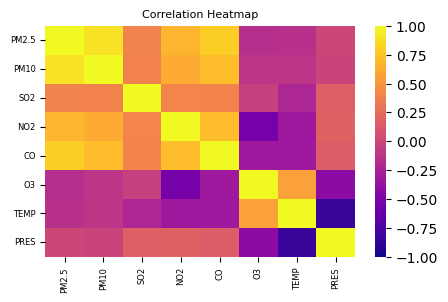

In [25]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
sns.heatmap(data=korelasi, ax=ax, cmap="plasma", vmin=-1, vmax=1, center=0)
ax.tick_params(axis='both', labelsize=6)
ax.set_title("Correlation Heatmap", fontsize=8, loc='center')

plt.show()

Berdasarkan heatmap tersebut didapat bahwa:
- Suhu cenderung meningkatkan konsentrasi ozon tapi mengurangi polutan lain.
- Suhu (TEMP) memiliki korelasi negatif dengan polutan utama seperti:
    PM2.5 = -0.32
    NO2 = -0.32
    CO = -0.32;
  Ini berarti: ketika suhu udara menurun, konsentrasi polutan cenderung meningkat.
- Tekanan udara memiliki kecenderungan menurunkan konsentrasi polutan, termasuk ozon.
- Tekanan memiliki korelasi positif dengan polutan, meski lebih lemah, contohnya:

  PM2.5 = 0.04 (hampir netral, sedikit positif)

  Korelasi kuat antara suhu dan tekanan (-0.84), yang wajar secara atmosferik: suhu rendah biasanya meningkatkan tekanan.

In [26]:
# Tampilan grafik scatter plot dengan menggunakan fungsi corr_scatter_graph(df)
def corr_scatter_graph(df):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    scatter_params = dict(s=400, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")

    for pol in pollutants:
        fig, ax = plt.subplots(figsize=(8, 3))
        ax.scatter(df['TEMP'], df[pol], **scatter_params)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xlabel("TEMPERATURE", fontsize=20)
        ax.set_ylabel(pol, fontsize=20)


    for pol in pollutants:
        fig, ax = plt.subplots(figsize=(8, 3))
        ax.scatter(df['PRES'], df[pol], **scatter_params)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xlabel("PRESSURE", fontsize=20)
        ax.set_ylabel(pol, fontsize=20)


    plt.suptitle("Tingkat Polusi Udara VS Tekanan", fontsize=45, y=1.05)
    plt.show(fig)

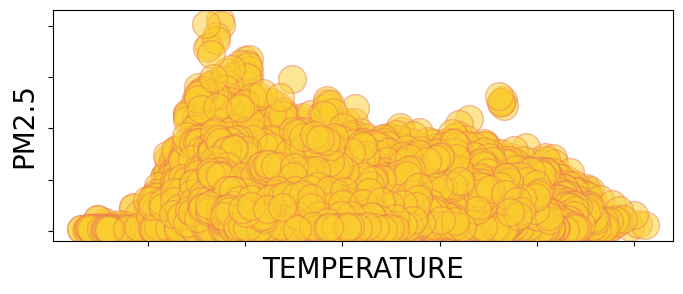

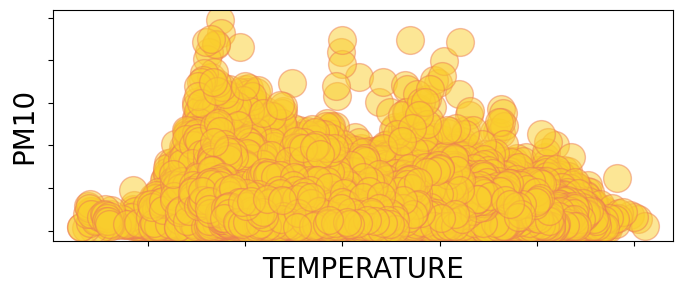

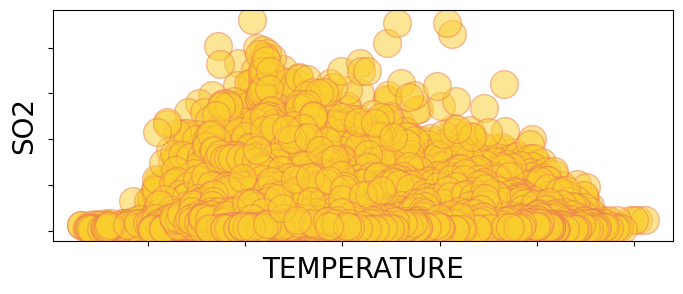

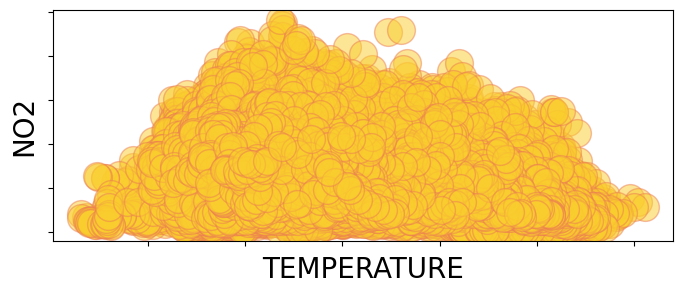

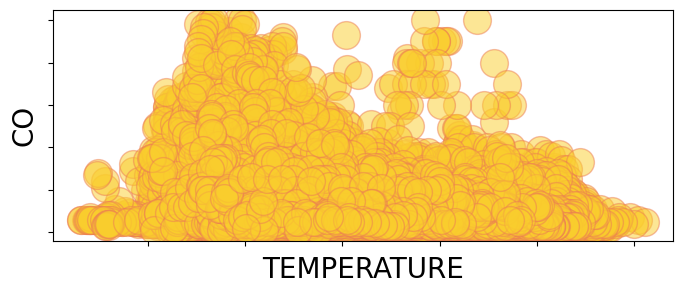

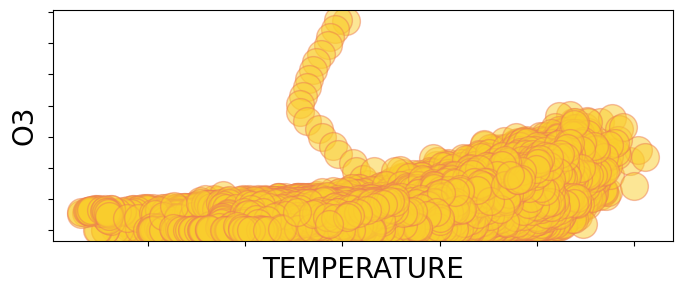

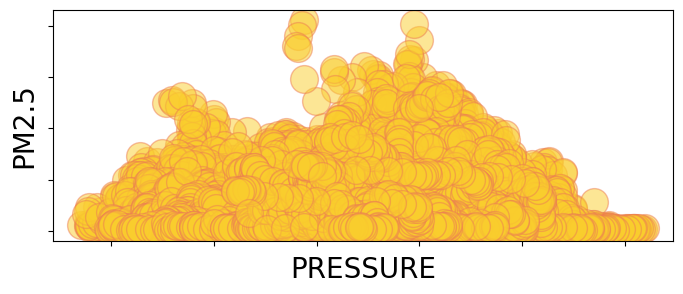

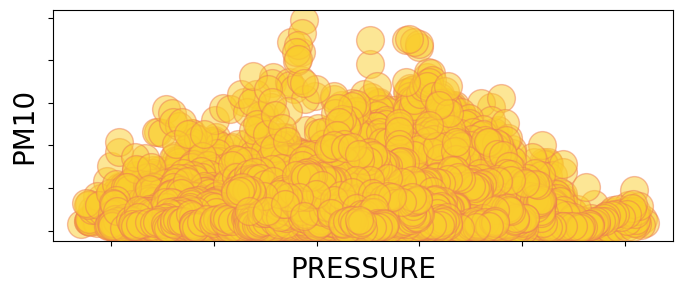

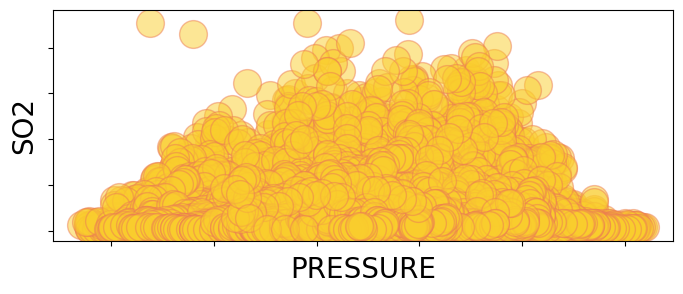

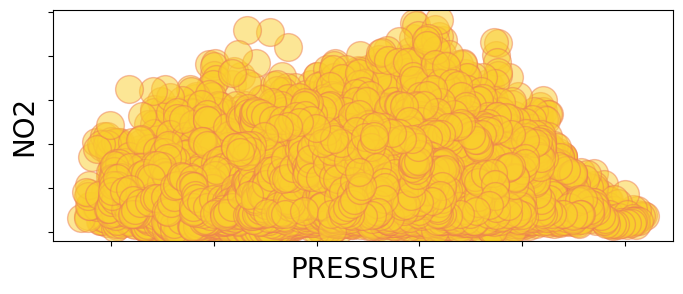

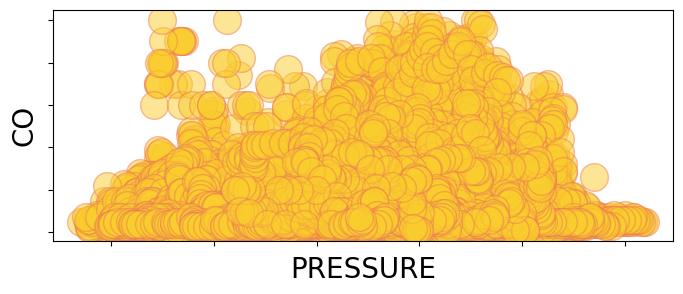

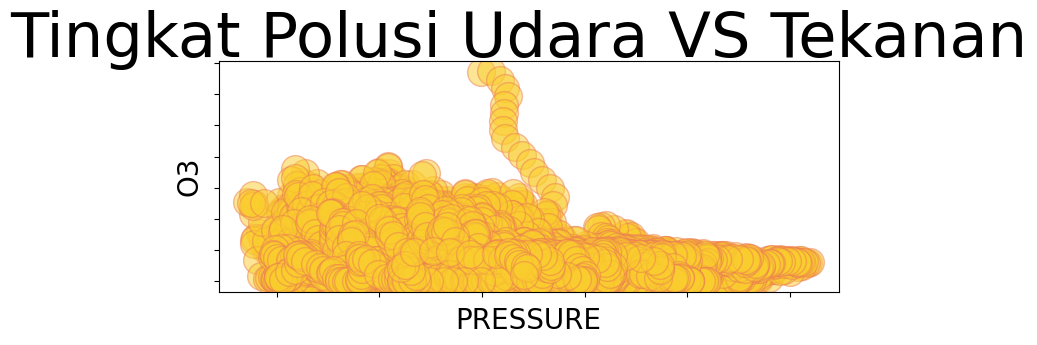

In [27]:
corr_scatter_graph(correlation_df)

Berdasarkan scatter plot tersebut didapat bahwa:
- Suhu tinggi menurunkan konsentrasi sebagian besar polutan (PM2.5, PM10, SO2, NO2, CO), tetapi meningkatkan ozon (O3).

- Scatter plot suhu menunjukkan tren garis miring ke bawah (downward slope), semakin rendah suhu, semakin tinggi polusi (terutama pada musim dingin – meski tidak eksplisit disebut musim, pola suhu rendah & polusi tinggi muncul di data).

- Tekanan tinggi cenderung mengurangi semua jenis polutan, termasuk ozon.

- Hubungan yang kompleks dan tidak selalu linear antara variabel meteorologi dan kualitas udara.



### Pertanyaan 2: Polutan apa yang memiliki jumlah paling tinggi?

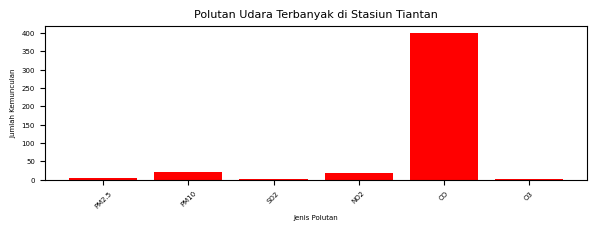

In [28]:
# Kolom-kolom yang mengandung data polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari frekuensi kemunculan masing-masing polutan
pollutant_counts = tian_df[pollutants].mode().iloc[0]

# Membuat diagram batang untuk polutan yang paling umum
fig, ax = plt.subplots(figsize=(7, 2))

ax.bar(pollutant_counts.index, pollutant_counts.values, color='red')
ax.set_title("Polutan Udara Terbanyak di Stasiun Tiantan", fontsize=8)
ax.set_xlabel("Jenis Polutan", fontsize=5)
ax.set_ylabel("Jumlah Kemunculan", fontsize=5)

ax.tick_params(axis='x', labelrotation=45, labelsize=5)
ax.tick_params(axis='y', labelsize=5)
plt.show()

In [29]:
tian_df.to_csv("tiantan.csv", index=False)

Berdasarkan bar chart tersebut didapat bahwa:
- Nilai polutan tertinggi adalah CO

**Insight:**
- Menampilkan korelasi tekanan dan suhu terhadap jumlah tekanan melalui visualisasi heat map dan scatter plot
- Menampilkan grafik jumlah polutan tertinggi menggunakan bar chart

## Analisis Lanjutan (Opsional)

## Conclusion

- Perubahan suhu dan udara umumnya tidak berpengaruh terhadap tingkat polusi karena nilai korelasinya masih di antara -0,5 sampai 0,5. Suhu adalah faktor penting yang meningkatkan polusi saat turun (korelasi negatif signifikan), sedangkan tekanan hanya punya pengaruh kecil.

- Polutan dengan jumlah tertinggi di stasiun Tiantan adalah CO dengan nilai frekuensi kemunculan sebesar 400. Namun, polusi partikulat (PM2.5/PM10) menjadi prioritas pengendalian karena risiko kesehatan kronis dan korelasinya yang sangat kuat dengan polutan lain.